In [59]:
import argparse
import numpy as np
import os
import random
import torch
import torch.optim as optim
import torch.optim.lr_scheduler as sched
import torch.backends.cudnn as cudnn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import util

from models import Glow
from tqdm import tqdm

transform_train = transforms.Compose([
    transforms.ToTensor()
])
trainset = torchvision.datasets.CIFAR10(root='dataset/cifar10-torchvision', train=True, download=False, transform=transform_train)
trainloader = data.DataLoader(trainset, batch_size=20, shuffle=True, num_workers=8)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
net1 = Glow(num_channels=512,
           num_levels=3,
           num_steps=16)
net1.to(device)
net1.load_state_dict({k.replace('module.', ''): v for k, v in
                     torch.load("ckpts/-1.pth.tar")['net'].items()})
net2 = Glow(num_channels=512,
           num_levels=3,
           num_steps=16)
net2.to(device)
net2.load_state_dict({k.replace('module.', ''): v for k, v in
                     torch.load("ckpts/-2.pth.tar")['net'].items()})

net1.eval()
net2.eval()

from PIL import Image

n = 0
for i, (image, label) in enumerate(trainloader):
    print('train,', n)

    z , _ = net1(image,reverse=False)  
    y , _ = net2(z, reverse=True)
    
    y = torch.sigmoid(y)
    img = Image.fromarray(np.uint8(255*y[0].detach().numpy().transpose(1,2,0)))
    if i==1:
        break
raw = Image.fromarray(np.uint8(255*image[0].numpy().transpose(1,2,0)))

train, 0
train, 0


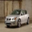

In [68]:
num = 3

raw = Image.fromarray(np.uint8(255*image[num].numpy().transpose(1,2,0)))
raw

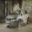

In [69]:
img = Image.fromarray(np.uint8(255*y[num].detach().numpy().transpose(1,2,0)))
img